# Profile's plots

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
lambda_i = 10e-2 #0.1Pa
h_L = lambda L: 0.86/np.sqrt(3+L/lambda_i)  # noqa: E731
h_R = lambda R: 0.8/np.sqrt(4+R/lambda_i)  # noqa: E731

print(h_L(10e-2), h_R(10e-2))

0.43 0.35777087639996635


D:\Users\Charlelie\AppData\Local\Temp\ipykernel_9964\923803414.py:2: RuntimeWarning: invalid value encountered in sqrt
  return lambda r,l: np.sqrt((1-(np.sqrt(1-h_R(R)**2)*r/R)**2) *


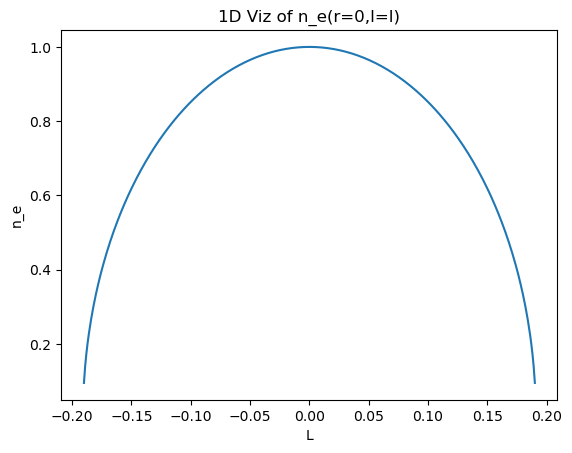

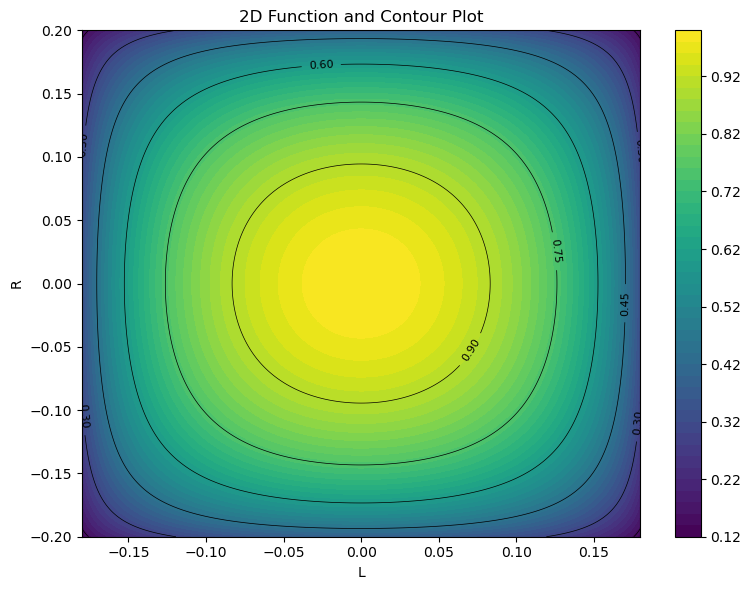

Integral :  0.5962408609876134


In [31]:
def get_h(R, L):
    return lambda r,l: np.sqrt((1-(np.sqrt(1-h_R(R)**2)*r/R)**2) *
                               (1-(np.sqrt(1-h_L(L)**2)*l/L)**2)) 

R = 18e-2
L= 20e-2

L_list = np.linspace(-L,L, 400)
n_e = get_h(R,L)(L_list, 0)
plt.plot(L_list,n_e)
plt.xlabel('L')
plt.ylabel('n_e')
plt.title('1D Viz of n_e(r=0,l=l)')

# Generate a grid of X and Y values
r = np.linspace(-R,R, 400)
z = np.linspace(-L, L, 400)
R_mesh, L_mesh = np.meshgrid(r, z)
Z_reeh = get_h(R, L)(R_mesh, L_mesh)

# Plotting
plt.figure(figsize=(8, 6))

# Filled contour
contour = plt.contourf(R_mesh, L_mesh, Z_reeh, levels=50, cmap='viridis')
plt.colorbar(contour)

# Contour lines
contour_lines = plt.contour(R_mesh, L_mesh, Z_reeh, colors='black', linewidths=0.5)

# Optional: Label the contour lines
plt.clabel(contour_lines, inline=True, fontsize=8)

# Labels and title
plt.xlabel('L')
plt.ylabel('R')
plt.title('2D Function and Contour Plot')

plt.tight_layout()
plt.show()

integrand = 2*np.pi*np.abs(R_mesh)* Z_reeh

integral_reeh = np.sum(integrand) / np.sum(2*np.pi*np.abs(R_mesh))
print("Integral : ", integral_reeh)


D:\Users\Charlelie\AppData\Local\Temp\ipykernel_9964\923803414.py:2: RuntimeWarning: invalid value encountered in sqrt
  return lambda r,l: np.sqrt((1-(np.sqrt(1-h_R(R)**2)*r/R)**2) *


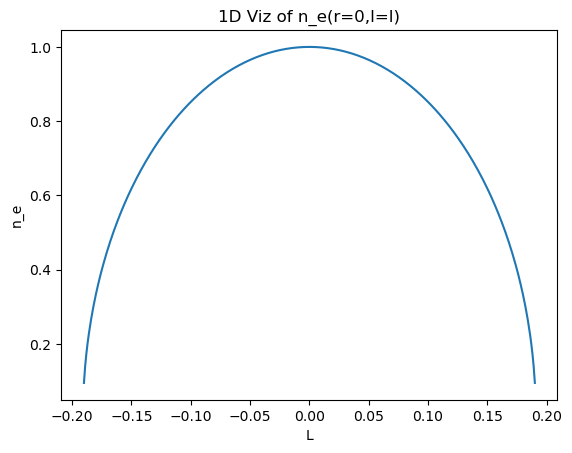

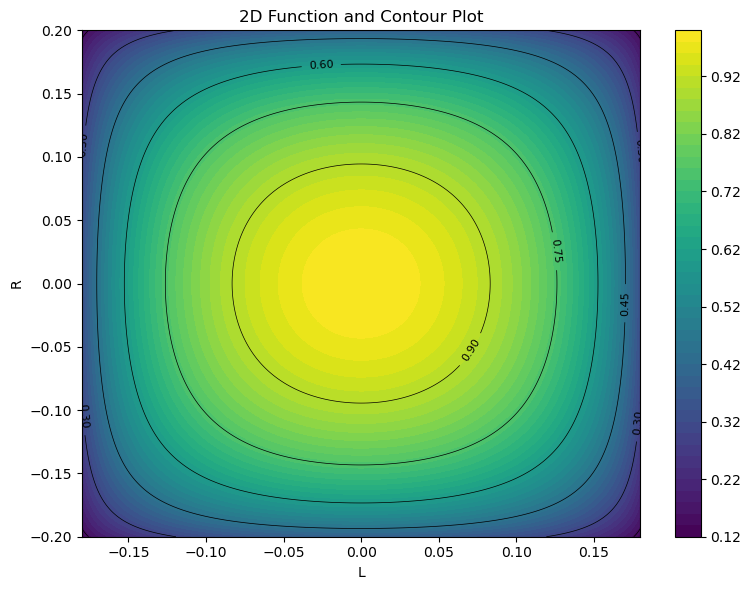

Integral :  0.5962408609876134


In [32]:
def get_h(R, L):
    return lambda r,l: np.sqrt((1-(np.sqrt(1-h_R(R)**2)*r/R)**2) *
                               (1-(np.sqrt(1-h_L(L)**2)*l/L)**2)) 

R = 18e-2
L= 20e-2

L_list = np.linspace(-L,L, 400)
n_e = get_h(R,L)(L_list, 0)
plt.plot(L_list,n_e)
plt.xlabel('L')
plt.ylabel('n_e')
plt.title('1D Viz of n_e(r=0,l=l)')

# Generate a grid of X and Y values
r = np.linspace(-R,R, 400)
z = np.linspace(-L, L, 400)
R_mesh, L_mesh = np.meshgrid(r, z)
Z_reeh = get_h(R, L)(R_mesh, L_mesh)

# Plotting
plt.figure(figsize=(8, 6))

# Filled contour
contour = plt.contourf(R_mesh, L_mesh, Z_reeh, levels=50, cmap='viridis')
plt.colorbar(contour)

# Contour lines
contour_lines = plt.contour(R_mesh, L_mesh, Z_reeh, colors='black', linewidths=0.5)

# Optional: Label the contour lines
plt.clabel(contour_lines, inline=True, fontsize=8)

# Labels and title
plt.xlabel('L')
plt.ylabel('R')
plt.title('2D Function and Contour Plot')

plt.tight_layout()
plt.show()

integrand = 2*np.pi*np.abs(R_mesh)* Z_reeh

integral_reeh = np.sum(integrand) / np.sum(2*np.pi*np.abs(R_mesh))
print("Integral : ", integral_reeh)


In [36]:
import pde
import numpy as np
from pde import PDE, ScalarField, CartesianGrid

D_a = 1e-5
coll_freq = 1e-5
n_sheath = 1
u_B = 1e-2

storage = pde.MemoryStorage()

def post_step_hook(state_data, t):
    nx, = state_data.shape
    cx = nx//2
    center_vals = state_data[cx-1:cx+1]
    m = center_vals.mean()
    state_data[:] = state_data/m

#grid = CartesianGrid([(-7.5e-2, 7.5e-2), (0, 40e-2)], 200)
grid  = CartesianGrid([(-7.5e-2, 7.5e-2)], 800)

#state = ScalarField.from_expression(grid, "exp(-(x**2 + (y - 20e-2)**2)/1e-4)")  # generate initial condition
state = ScalarField.from_expression(grid, "exp(-x**2 /1e-4)")  # generate initial condition

boundary_cond = {"type": "mixed", "value": u_B/D_a, "const":0}
#boundary_cond = {"value": 1}

eq = PDE({"n": f"{D_a}*laplace(n)+n*{coll_freq}"}, bc = boundary_cond, post_step_hook=post_step_hook)  # define the pde
scipy_solver = pde.ScipySolver(eq, method="LSODA")
controller = pde.Controller(scipy_solver, t_range=1e5, tracker=["progress", storage.tracker(interrupts=100)])
result = controller.run(state)
#result = eq.solve(state, t_range=100000, tracker=["progress", "steady_state"], solver=scipy_solver)
result.plot()

  0%|          | 0/100000.0 [00:00<?, ?it/s]

AttributeError: 'list' object has no attribute 'reshape'

['x']


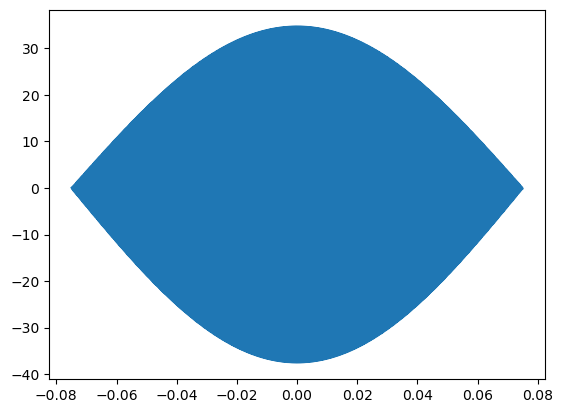

In [20]:
import matplotlib.pyplot as plt
print(result.grid.axes)
apply_d2x = result.grid.make_operator("d2_dx2", boundary_cond)
plt.plot(result.grid.axes_coords[0],apply_d2x(result.data))

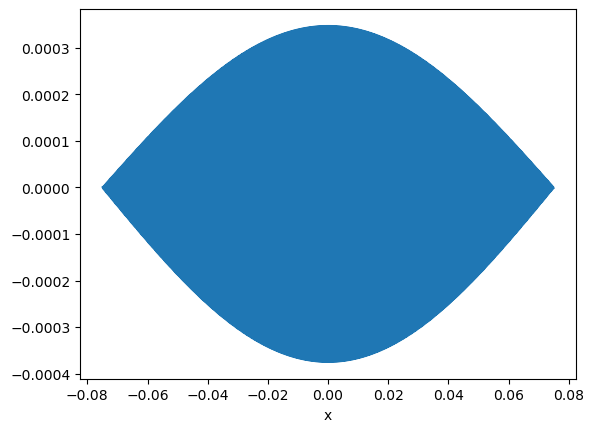

In [10]:
(D_a*result.laplace(boundary_cond) + result.data * coll_freq).plot()

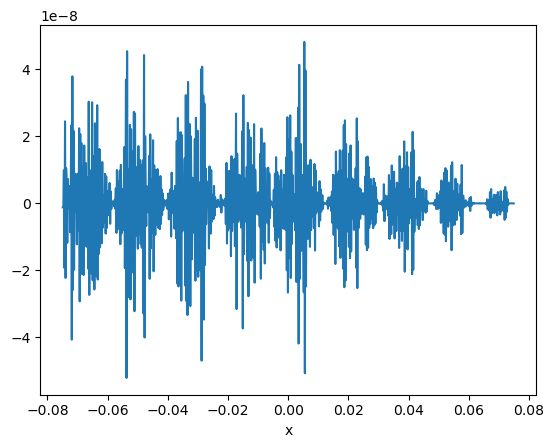

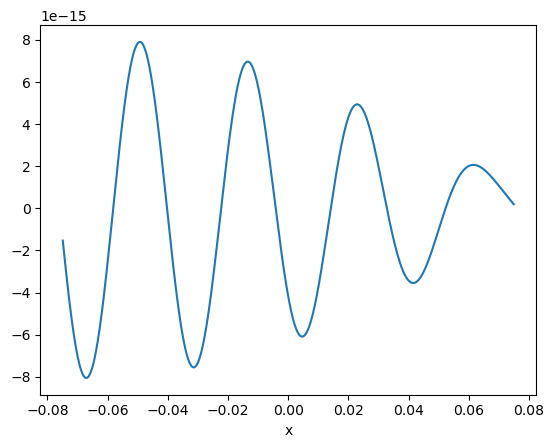

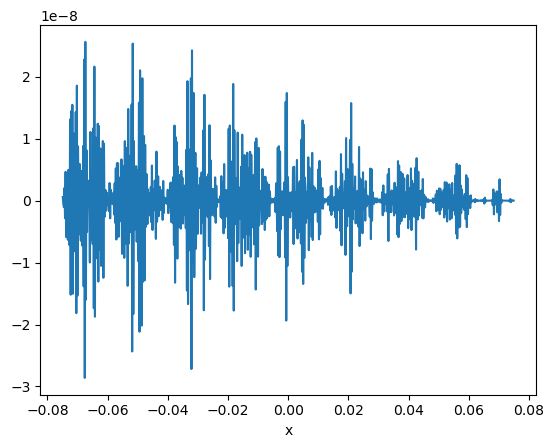

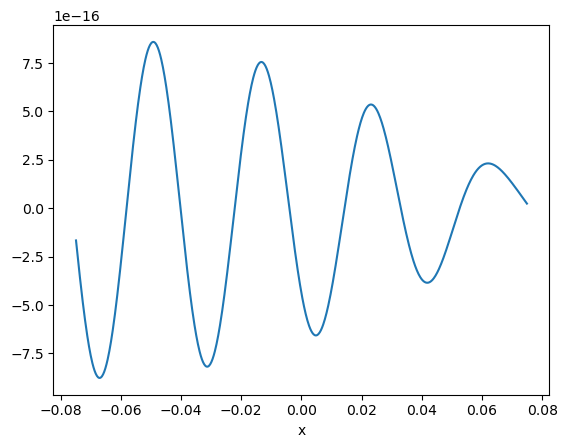

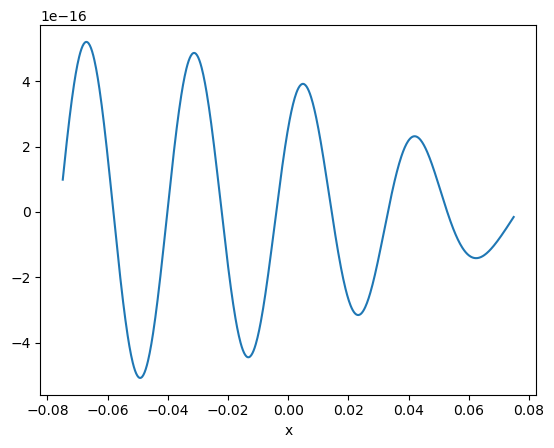

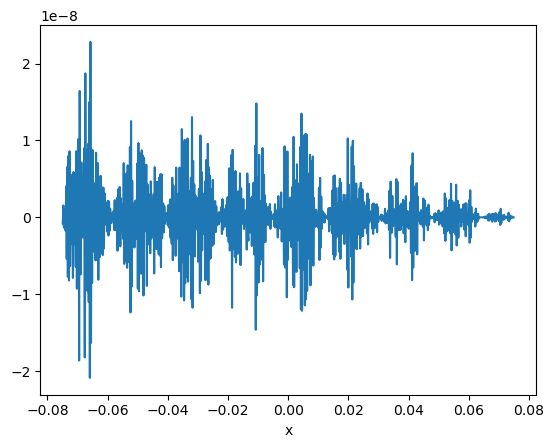

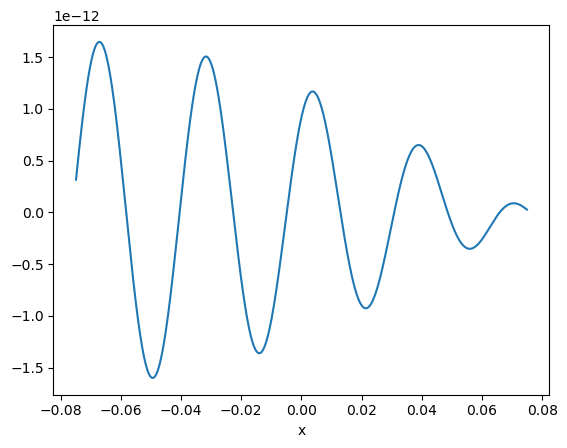

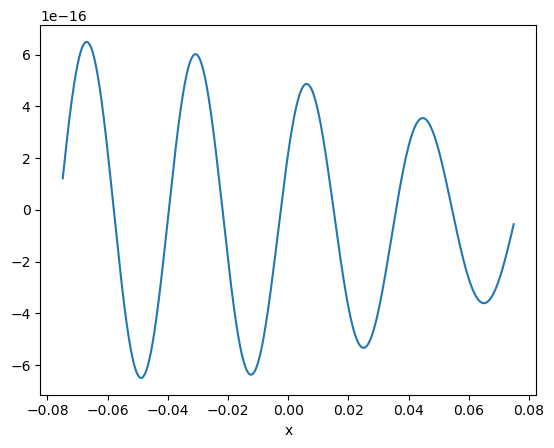

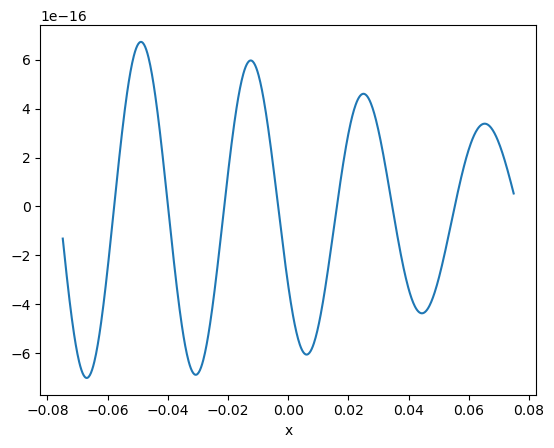

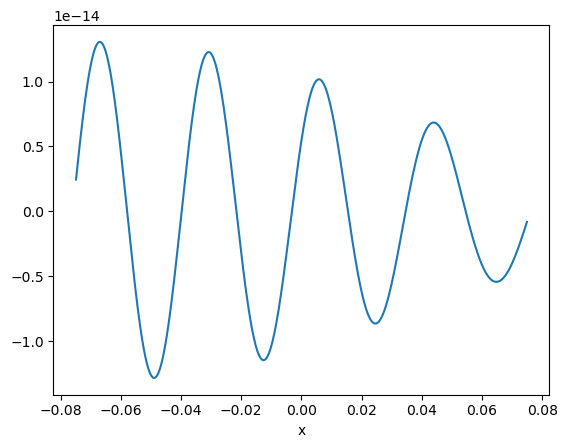

In [37]:
#lap = grid.get_operator
i = 0
for time, field in list(storage.items())[-10:]:
    field.plot()
    i += 1
    if i > 20:
        break

In [31]:
a = np.array([1.,2,3,4,5])
post_step_hook(a, 1)
a

array([0.4, 0.8, 1.2, 1.6, 2. ])

# Fenicsx

In [4]:
from mpi4py import MPI
import gmsh
import ufl
import numpy as np

from dolfinx.io import gmshio
from dolfinx import fem, default_scalar_type
from dolfinx.fem.petsc import LinearProblem

# --- Parameters ---
R = 1.0
L = 1.0
A = 1.0
u_B = 1.0
Number_of_elements = 40
Degree_of_elements = 1

# --- Build cylinder mesh with gmsh ---
gmsh.initialize()
gmsh.model.add("cylinder")
cyl = gmsh.model.occ.addCylinder(0, 0, 0, L, 0, 0, R)
gmsh.model.occ.synchronize()

# Tag the volume (dim=3) so dolfinx can import it
volumes = gmsh.model.getEntities(dim=3)
gmsh.model.addPhysicalGroup(3, [volumes[0][1]], 1)

# Optional: tag the whole surface as boundary
surfaces = gmsh.model.getEntities(dim=2)
gmsh.model.addPhysicalGroup(2, [s[1] for s in surfaces], 1)

# Set mesh size
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", 2*R/Number_of_elements)

# Generate 3D mesh
gmsh.model.mesh.generate(3)

# --- Import into dolfinx ---
msh, _, _ = gmshio.model_to_mesh(gmsh.model, MPI.COMM_WORLD, 0, gdim=3)
gmsh.finalize()

V = fem.FunctionSpace(msh, ("Lagrange", Degree_of_elements))
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

dx = ufl.dx(domain=msh)
ds = ufl.ds(domain=msh)

# Weak form
a = ufl.inner(ufl.grad(u), ufl.grad(v)) * dx - A * u * v * dx + u_B * u * v * ds
L = ufl.Constant(msh, default_scalar_type(0.0)) * v * dx

uh = fem.Function(V)
problem = LinearProblem(a, L, u=uh, petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
problem.solve()

# Integral of solution
I_local = fem.assemble_scalar(fem.form(uh * ufl.Constant(msh, 1.0) * dx))
I_total = msh.comm.allreduce(I_local, op=MPI.SUM)
if msh.comm.rank == 0:
    print(f"Integral of solution = {I_total:.6f}")


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 40%] Meshing curve 2 (Line)
Info    : [ 70%] Meshing curve 3 (Circle)
Info    : Done meshing 1D (Wall 0.0101544s, CPU 0.009211s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Cylinder, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.837381s, CPU 0.783968s)
Info    : Meshing 3D...
Info    : 3D Meshing 1 volume with 1 connected component
Info    : Tetrahedrizing 5935 nodes...
Info    : Done tetrahedrizing 5943 nodes (Wall 0.39983s, CPU 0.400486s)
Info    : Reconstructing mesh...
Info    :  - Creating surface mesh
Info    :  - Identifying boundary edges
Info    :  - Recovering boundary
Info    : Done reconstructing mesh (Wall 1.61229s, CPU 0.866133s)
Info    : Found volume 1
Info    : It. 0 - 0 nodes created - worst tet radius 10.0444 (nodes removed 0 0)
Info    : It. 500 - 

TypeError: FunctionSpace.__init__() missing 1 required positional argument: 'cppV'

In [2]:
from mpi4py import MPI
from dolfinx import mesh
import numpy

domain = mesh.create_unit_square(MPI.COMM_WORLD, 8, 8, mesh.CellType.quadrilateral)

from dolfinx import fem

V = fem.functionspace(domain, ("Lagrange", 1))

uD = fem.Function(V)
uD.interpolate(lambda x: 1 + x[0] ** 2 + 2 * x[1] ** 2)

tdim = domain.topology.dim
fdim = tdim - 1
domain.topology.create_connectivity(fdim, tdim)
boundary_facets = mesh.exterior_facet_indices(domain.topology)

boundary_dofs = fem.locate_dofs_topological(V, fdim, boundary_facets)
bc = fem.dirichletbc(uD, boundary_dofs)


import ufl

u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

from dolfinx import default_scalar_type

f = fem.Constant(domain, default_scalar_type(-6))

a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = f * v * ufl.dx


In [3]:
from dolfinx.fem.petsc import LinearProblem

problem = LinearProblem(
    a,
    L,
    bcs=[bc],
    petsc_options={"ksp_type": "preonly", "pc_type": "lu"},
    petsc_options_prefix="Poisson",
)
uh = problem.solve()

V2 = fem.functionspace(domain, ("Lagrange", 2))
uex = fem.Function(V2)
uex.interpolate(lambda x: 1 + x[0] ** 2 + 2 * x[1] ** 2)


L2_error = fem.form(ufl.inner(uh - uex, uh - uex) * ufl.dx)
error_local = fem.assemble_scalar(L2_error)
error_L2 = numpy.sqrt(domain.comm.allreduce(error_local, op=MPI.SUM))

error_max = numpy.max(numpy.abs(uD.x.array - uh.x.array))
# Only print the error on one process
if domain.comm.rank == 0:
    print(f"Error_L2 : {error_L2:.2e}")
    print(f"Error_max : {error_max:.2e}")

Exception ignored in: <function LinearProblem.__del__ at 0x7cea5b156700>
Traceback (most recent call last):
  File "/usr/local/dolfinx-real/lib/python3.12/dist-packages/dolfinx/fem/petsc.py", line 831, in __del__
    self._solver.destroy()
    ^^^^^^^^^^^^
AttributeError: 'LinearProblem' object has no attribute '_solver'


TypeError: LinearProblem.__init__() got an unexpected keyword argument 'petsc_options_prefix'

In [ ]:
import pyvista

print(pyvista.global_theme.jupyter_backend)
pyvista.start_xvfb(0.1)

# +
from dolfinx import plot

domain.topology.create_connectivity(tdim, tdim)
topology, cell_types, geometry = plot.vtk_mesh(domain, tdim)
grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)

plotter = pyvista.Plotter(off_screen=True)
plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
plotter.show()
figure = plotter.screenshot("fundamentals_mesh.png")



In [ ]:
# ## Plotting a function using pyvista
# We want to plot the solution `uh`. As the function space used to defined the mesh is disconnected from the function space defining the mesh, we create a mesh based on the dof coordinates for the function space `V`. We use `dolfinx.plot.vtk_mesh` with the function space as input to create a mesh with mesh geometry based on the dof coordinates.

u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)

u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
u_grid.point_data["u"] = uD.x.array.real
u_grid.set_active_scalars("u")
u_plotter = pyvista.Plotter(off_screen=True)
u_plotter.add_mesh(u_grid, show_edges=True)
u_plotter.view_xy()
u_plotter.show()
figure = plotter.screenshot("fundamentals_mesh_u.png")

# We can also warp the mesh by scalar to make use of the 3D plotting.

warped = u_grid.warp_by_scalar()
plotter2 = pyvista.Plotter(off_screen=True)
plotter2.add_mesh(warped, show_edges=True, show_scalar_bar=True)
plotter2.show()
figure = plotter2.screenshot("fundamentals_mesh2.png")

# Fenics legacy

In [5]:
!wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"

/tmp/fenics-install.sh: Permission denied


In [9]:
!bash "/tmp/fenics-install.sh"

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ set +x
























################################################################################
#     This installation is offered by FEM on Colab, an open-source project     #
#       developed and maintained at Università Cattolica del Sacro Cuore       #
#   by Prof. Francesco Ballarin. Please see https://fem-on-colab.github.io/    #
#       for more details, including a list of further available packages       #
#       and how to sponsor the development or contribute to the project.       #
#                                                                              #
#   We are conducting an informal survey on FEM on Colab usage by our users.   #
#   The survey is anon

In [8]:
import dolfin

ModuleNotFoundError: No module named 'dolfin'

In [3]:
import  fenics as fe

from mshr import *

 


R = 1.0  # Radius of the cylinder
L = 1   #length of the cylinder

A = 1
u_B = 1

#Données de précision
Number_of_elemnts = 40 #définit la précision du calcul et augmente le temps de calcul
Degree_of_elements = 1 #définit la précision du calcul

# Define the geometry and mesh
cylinder = Cylinder(fe.Point(0, 0, 0), fe.Point(L, 0, 0), R, R)

mesh = generate_mesh(cylinder, Number_of_elemnts) # Generates a mesh with Number_of_elements divisions
lagrange_vector_space_first_order = fe.FunctionSpace(
        mesh,
        "Lagrange",
        Degree_of_elements,
    )


n_trial = fe.TrialFunction(lagrange_vector_space_first_order) #guess function
v_test = fe.TestFunction(lagrange_vector_space_first_order) #test function v

#definition of the weak form of the problem
weak_form_rhs = (v_test - v_test) * fe.dx  
weak_form_lhs = (
    fe.dot(fe.grad(n_trial), fe.grad(v_test)) * fe.dx #consequence of the IPP
    +
    u_B * n_trial * v_test * fe.ds #consequence of the boundary conditions
    -
    A * n_trial * v_test * fe.dx 
)

#solving
n_solution = fe.Function(lagrange_vector_space_first_order)
fe.solve(
    weak_form_lhs == weak_form_rhs,
    n_solution,
)

#getting the integral value
#J'ai pas encore trouvé la fonction pour calculer l'intégrale
print(fe.assemble(n_solution * fe.dx))

#If you want a .xdmf file
# Sphere_file = fe.XDMFFile("Cylinder.xdmf")
# Sphere_file.parameters["flush_output"] = True
# Sphere_file.parameters["functions_share_mesh"] = True
# Sphere_file.write(n_solution, 0.0)


ModuleNotFoundError: No module named 'fenics'

# Comparaison expérimentale Zhu

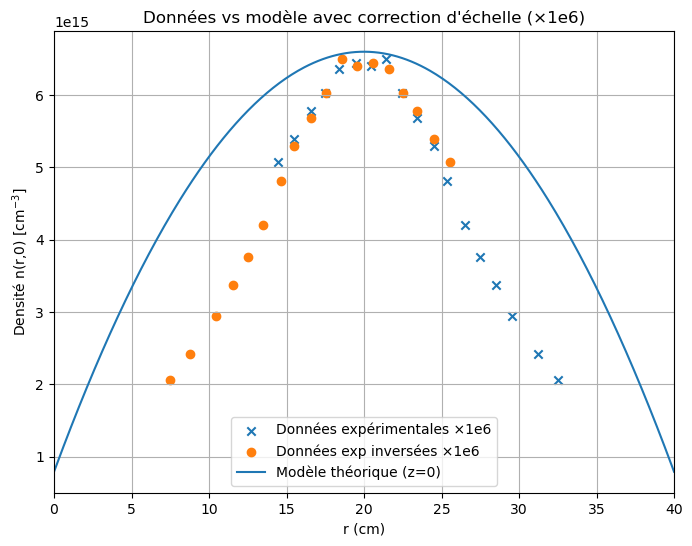

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Données expérimentales (densité à multiplier par 1e6)
r_exp = np.array([
    1.79775e+1, 2.00749e+1, 2.18727e+1, 2.49438e+1, 2.80150e+1,
    3.19850e+1, 3.60300e+1, 1.89971e+1, 2.09738e+1, 2.29505e+1,
    2.39388e+1, 2.59675e+1, 2.69039e+1, 2.88285e+1, 3.00250e+1,
    3.10133e+1, 3.30420e+1, 3.47066e+1
])-3.5

n_exp = 1e6 * np.array([
    5.07700e+9, 5.77673e+9, 6.36412e+9, 6.50256e+9, 5.30028e+9,
    3.37316e+9, 2.05629e+9, 5.38813e+9, 6.02718e+9, 6.44644e+9,
    6.39845e+9, 6.02718e+9, 5.67745e+9, 4.81684e+9, 4.21067e+9,
    3.76422e+9, 2.94163e+9, 2.42223e+9
])

# Paramètres du modèle
h_L = 0.12
n_c = 6.6e15
L = 40  # cm

# Modèle n(r,0)
def n_model(z):
    f_z = 1 - (1 - h_L) * (2*(z-20) / L)**2
    return n_c * f_z

# Courbe modèle
z_model = np.linspace(0, 40, 400)
n_model_vals = n_model(z_model)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(r_exp, n_exp, label="Données expérimentales ×1e6", marker="x")
plt.scatter(40-r_exp, n_exp, label="Données exp inversées ×1e6", marker="o")
plt.plot(z_model, n_model_vals, label="Modèle théorique (z=0)")
plt.xlim(0, 40)
#plt.yscale("log")
plt.xlabel("r (cm)")
plt.ylabel("Densité n(r,0) [cm$^{-3}$]")
plt.legend()
plt.grid(True, which="both")
plt.title("Données vs modèle avec correction d'échelle (×1e6)")
plt.show()


In [2]:
n_model_vals

array([-2.98784255e+16, -3.02169749e+16, -3.05570305e+16, -3.08985924e+16,
       -3.12416605e+16, -3.15862347e+16, -3.19323153e+16, -3.22799020e+16,
       -3.26289949e+16, -3.29795941e+16, -3.33316995e+16, -3.36853111e+16,
       -3.40404289e+16, -3.43970529e+16, -3.47551832e+16, -3.51148196e+16,
       -3.54759623e+16, -3.58386112e+16, -3.62027663e+16, -3.65684277e+16,
       -3.69355953e+16, -3.73042690e+16, -3.76744490e+16, -3.80461352e+16,
       -3.84193277e+16, -3.87940263e+16, -3.91702312e+16, -3.95479423e+16,
       -3.99271596e+16, -4.03078831e+16, -4.06901129e+16, -4.10738488e+16,
       -4.14590910e+16, -4.18458394e+16, -4.22340940e+16, -4.26238548e+16,
       -4.30151219e+16, -4.34078952e+16, -4.38021747e+16, -4.41979604e+16,
       -4.45952523e+16, -4.49940504e+16, -4.53943548e+16, -4.57961654e+16,
       -4.61994822e+16, -4.66043052e+16, -4.70106344e+16, -4.74184699e+16,
       -4.78278115e+16, -4.82386594e+16, -4.86510135e+16, -4.90648738e+16,
       -4.94802404e+16, -